<div style="background-color: lightgray;text-align: center;line-height:10px; padding: 10px; border-radius: 5px; font-size:16px;">
    <h1>LENDING CLUB CASE STUDY</h1>
    <p><b>By:</b></p>
    <p>Deepak TM (Group Facilitator)</p>
    <p>Shaily</p>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h2 style="color: black;">Primary Goal of the Analysis</h2>
</div>

<div style="background-color: offwhite; padding: 10px; border-radius: 5px;">
<p>The primary goal of this exploratory data analysis (EDA) case study is to <b>identify the key factors and patterns that drive loan defaults</b>, with a specific focus on distinguishing between loans that are "Fully Paid" and those that are "Charged Off".</p>
<h2>Understanding Loan Status and Data Limitations</h2>
<p>The loan dataset includes a <code>loan_status</code> column, which categorizes loans into three states:</p>
<ul>
<li><b>Fully Paid:</b> The borrower has successfully repaid the loan in full.</li>
<li><b>Charged Off:</b> The loan has been deemed uncollectible and is considered a loss for the lender (default).</li>
<li><b>Current:</b> The borrower is currently making payments, and the loan is in good standing.</li>
</ul>

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
<p>By focusing on loans with definitive outcomes ("Fully Paid" or "Charged Off"), we aim to uncover patterns and relationships that can help business:</p>
<ul>
<li><b>Identify High-Risk Borrowers:</b> Determine the borrower characteristics, loan attributes, and credit history factors that are strong predictors of loan defaults.</li>
<li><b>Inform Lending Decisions:</b> Use the insights from EDA to refine lending policies, adjust interest rates based on risk, and develop more effective underwriting criteria.</li>

</ul>
<p>The ultimate aim is to leverage the power of data exploration and analysis to reduce credit losses, improve loan portfolio performance, and make more informed lending decisions.</p>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h2 style="color: black;">Data Discovery</h2>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Import Libraries</h3>
</div>

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

# ignoring the warning
warnings.filterwarnings('ignore')

# customize global behavior related to DataFrame display
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# Setting Style
plt.style.use('tableau-colorblind10')

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Load Dataset From CSV</h3>
</div>

In [8]:
df_orig = pd.read_csv('loan.csv', low_memory=False)

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Explore the Dataset</h3>
</div>

In [10]:
df_orig.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
raw_data_shape = df_orig.shape
print (f'The raw dataset contains: {raw_data_shape[0]} Rows and {raw_data_shape[1]} Columns')

The raw dataset contains: 39717 Rows and 111 Columns


In [12]:
df_orig.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,26775,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,1140,39715,39661.0,0.0,39717.0,39717,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26526,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.14

In [13]:
df_orig.groupby(by= 'loan_status')['loan_status'].count()

loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
Name: loan_status, dtype: int64

<div style="background-color: lightyellow; padding: 30px; border-radius: 5px;">
    <h4 style="color: black;">Approach</h4>
    <p> Loans with a "Current" status are excluded from this analysis. This is because they represent incomplete loan cycles. We lack information about their final outcome (whether they will be fully paid or eventually charged off). Including them would introduce bias and prevent us from drawing reliable conclusions about the factors associated with defaults. </p>
    <p><b> So, Dropping the records with loan_status = 'current</b>'</p>
    
</div>

In [15]:
df = df_orig[(df_orig.loan_status != 'Current')]

In [16]:
print (f'The dataset contains: {df.shape[0]} Rows and {df.shape[1]} Columns')

The dataset contains: 38577 Rows and 111 Columns


<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h2 style="color: black;">Data Handling and Cleaning:</h2>
</div>

<div style="background-color: lightyellow; padding: 30px; border-radius: 5px;">
    <h4 style="color: black;">Approach</h4>
    <li>
      <b>Handle Missing Values and Datatypes:</b>
      <p>Ensure no missing values or incorrect datatypes. Impute missing data or remove rows/columns with excessive nulls. Convert columns to proper datatypes (e.g., integers, floats, datetime).</p></li>
    <li>
      <b>Drop Columns with Duplicates:</b>
      <p>Remove columns where all rows have the same value, as they add no useful information.</p></li>
    <li>
      <b>Drop Columns with >60% Nulls:</b>
      <p>Columns with more than 60% missing values should be removed to ensure data quality.</p></li>  
</div>


In [19]:
columns_name = df.columns.values
columns_name

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Dropping columns which haves duplicate values</h3>
</div>

In [21]:
df = df.drop_duplicates(subset='id')

In [22]:
print (f'Number of rows after dropping duplicates: {df.shape[0]}')

Number of rows after dropping duplicates: 38577


<div style="background-color: #d4ebf2; padding: 10px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <p>There are not Duplicate records in the dataset.</p>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Checking columns that contains 100% Null Values</h3>
</div>

In [25]:
null_perc = df.isnull().mean().sort_values(ascending=False) *100
null_perc

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [26]:
df = df.loc[:,null_perc<60]

In [27]:
print (f'The current dataset contains: {df.shape[0]} Rows and {df.shape[1]} Columns')

The current dataset contains: 38577 Rows and 54 Columns


<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Dropping columns that contains 1 unique Value</h3>
</div>

In [29]:
one_unq_val_cols = df.nunique().sort_values()[df.nunique().sort_values().values == 1]
print (one_unq_val_cols)
print (f'\nNumber of columns with 1 Unique values: {len(one_unq_val_cols)}')

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
initial_list_status           1
out_prncp                     1
collections_12_mths_ex_med    1
out_prncp_inv                 1
pymnt_plan                    1
dtype: int64

Number of columns with 1 Unique values: 11


In [30]:
df.drop(columns=one_unq_val_cols.index, inplace=True)

In [31]:
print (f'The current dataset contains: {df.shape[0]} Rows and {df.shape[1]} Columns')

The current dataset contains: 38577 Rows and 43 Columns


<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Dropping Other columns that aren't requried for analysis</h3>
</div>

In [33]:
df.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577,38577,38577.000000,38577,38577,36191,37544,38577,3.857700e+04,38577,38577,38577,38577,26048,38577,38566,38577,38577,38577.000000,38577.000000,38577,38577.000000,38577.000000,38577.000000,38577.000000,38527,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38506,38577.000000,38575,37880.000000
unique,NaN,NaN,NaN,NaN,NaN,2,370,NaN,7,35,28027,11,5,NaN,3,55,2,38577,25802,14,19297,822,50,NaN,NaN,524,NaN,NaN,NaN,NaN,1088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,106,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,A4,US Army,10+ years,RENT,NaN,Not Verified,Nov-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Oct-99,NaN,NaN,NaN,NaN,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar-13,NaN,May-16,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,913,NaN,11675,2873,131,8488,18480,NaN,16694,2062,32950,1,209,18055,2090,583,6949,NaN,NaN,360,NaN,NaN,NaN,NaN,954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026,NaN,9333,NaN
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,NaN,NaN,322.466318,NaN,NaN,NaN,NaN,NaN,6.877797e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.272727,0.146668,NaN,0.871737,9.275423,0.055422,13289.489826,NaN,22.052648,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,NaN,2746.243218,NaN,0.043479
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,NaN,NaN,208.639215,NaN,NaN,NaN,NaN,NaN,6.421868e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.673044,0.492271,NaN,1.071546,4.401588,0.237804,15866.492241,NaN,11.425861,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,NaN,4494.648131,NaN,0.204583
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,2.000000,0.000000,0.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,NaN,NaN,165.740000,NaN,NaN,NaN,NaN,NaN,4.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.130000,0.000000,NaN,0.000000,6.000000,0.000000,3650.000000,NaN,13.000000,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,NaN,217.420000,NaN,0.000000
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,NaN,NaN,277.860000,NaN,NaN,NaN,NaN,NaN,5.886800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.370000,0.000000,NaN,1.000000,9.000000,0.000000,8762.000000,NaN,20.000000,9674.048405,9066.660000,8000.000000,1300.450000,0.000000,0.000000,0.000000,NaN,568.260000,NaN,0.000000
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,NaN,NaN,425.550000,NaN,NaN,NaN,NaN,NaN,8.200000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.560000,0.000000,NaN,1.000000,12.000000,0.000000,16912.000000,NaN,29.000000,16136.952430,15329.780000,13175.000000,2671.980000,0.000000,0.000000,0.000000,NaN,3447.250000,NaN,0.000000


<div style="background-color: #d4ebf2; padding: 10px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <p><b>id, member_id and url</b> are all of unique values. Hence Dropping off.</p>
    <p><b>emp_title, desc, zip_code and title</b> are irrelavent to our analysis.</p>
</div>

In [35]:
addition_col_to_drop = ['id', 'member_id', 'emp_title', 'url', 'desc', 'title', 'zip_code']

df.drop(columns=addition_col_to_drop, inplace=True)

In [36]:
print (f'The current dataset contains: {df.shape[0]} Rows and {df.shape[1]} Columns')

The current dataset contains: 38577 Rows and 36 Columns


<div style="background-color: #d4ebf2; padding: 10px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <li><b>total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d</b> are the columns which are added post approval of loan.</li>
    <li><b>collection_recovery_fee, recoveries</b> are columns which are calculated post <b>Charged Off.</b></li>
    <p> </p>
    <p>Hence dropping all these columns.</p>
</div>

In [38]:
addition_col_to_drop = ['total_pymnt','total_pymnt_inv',
                        'total_rec_prncp','total_rec_int',
                        'total_rec_late_fee','last_pymnt_amnt',
                        'last_pymnt_d','last_credit_pull_d',
                        'collection_recovery_fee','recoveries']

df.drop(columns=addition_col_to_drop, inplace=True)

In [39]:
print (f'The current dataset contains: {df.shape[0]} Rows and {df.shape[1]} Columns')

The current dataset contains: 38577 Rows and 26 Columns


<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Renaming columns for better readability</h3>
</div>

In [41]:
df.rename(columns={'int_rate': 'interest_rate',
                  'issue_d': 'issue_date',
                  'earliest_cr_line': 'earliest_credit_line_date'}, inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_amnt                  38577 non-null  int64  
 1   funded_amnt                38577 non-null  int64  
 2   funded_amnt_inv            38577 non-null  float64
 3   term                       38577 non-null  object 
 4   interest_rate              38577 non-null  object 
 5   installment                38577 non-null  float64
 6   grade                      38577 non-null  object 
 7   sub_grade                  38577 non-null  object 
 8   emp_length                 37544 non-null  object 
 9   home_ownership             38577 non-null  object 
 10  annual_inc                 38577 non-null  float64
 11  verification_status        38577 non-null  object 
 12  issue_date                 38577 non-null  object 
 13  loan_status                38577 non-null  object 


<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Converting Data Type</h3>
</div>

<div style="background-color: lightyellow; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Approach</h4>
<ul>
  <li>
    <b>Interest Rate (<code>interest_rate</code>):</b> The percentage sign (%) should be removed from the <code>interest_rate</code> column, and the data type should be converted to <code>float64</code> for numerical analysis.
  </li>
  <li>
    <b>Revolving Utilization (<code>revol_util</code>):</b> Similar to the interest rate, the percentage sign (%) should be removed from <code>revol_util</code>, and the column should be converted to the <code>float64</code> data type. 
  </li>
  <li>
    <b>Issue Date (<code>issue_date</code>):</b> The <code>issue_date</code> column, representing the date the loan was issued, should be converted to a <code>datetime</code> format for easier handling of date-related calculations and analysis. 
  </li>
</ul>
</div>

In [45]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format="%b-%y", errors='coerce')

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Removing the % sign from the 2 columns and convert to Float</h4>
</div>

In [47]:
df['interest_rate']   = df['interest_rate'].str.replace('%',"").astype('float64')
df['revol_util'] = df['revol_util'].str.replace('%',"").astype('float64')

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Imputing Missing values</h3>
</div>


In [49]:
(df.isnull().mean().sort_values(ascending=False)*100).head(5)

emp_length              2.677761
pub_rec_bankruptcies    1.806776
revol_util              0.129611
purpose                 0.000000
total_acc               0.000000
dtype: float64

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Categorical columns Imputation</h4>
</div>


<div style="background-color: lightyellow; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Approach</h4>
    <p>Going to impute categorical columns with <b>MODE</b></p>
</div>

In [52]:
df['emp_length'] = df['emp_length'].fillna(value=df['emp_length'].mode()[0])

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Numerical columns Imputation</h4>
</div>

<div style="background-color: lightyellow; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Approach</h4>
    <p>Going to impute numerical columns with <b>MEDIAN</b></p>
</div>

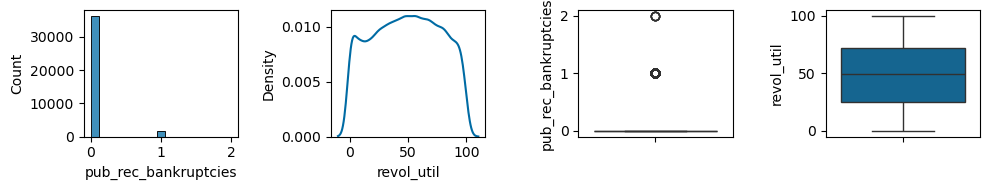

In [55]:
plt.figure(figsize=(10,2))

# Plot 1
plt.subplot(1,4,1)
sns.histplot(data=df, x='pub_rec_bankruptcies')

# Plot 2
plt.subplot(1,4,2)
sns.kdeplot(df, x='revol_util')

# Plot 3
plt.subplot(1,4,3)
sns.boxplot(df, y='pub_rec_bankruptcies')

# Plot 4
plt.subplot(1,4,4)
sns.boxplot(df, y='revol_util')

plt.tight_layout()
plt.show()

<div style="background-color: lightyellow; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Reasoning</h4>
    <p>To better understand the distributions of pub_rec_bankruptcies (number of public record bankruptcies) and revol_util (revolving line utilization), we used a combination of visualizations:</p>
    <li><b>pub_rec_bankruptcies:</b> Bar plots and box plots were used to visualize this discrete variable. These visualizations clearly showed that the majority of borrowers have a value of 0 for pub_rec_bankruptcies. Therefore, using the median would be the most appropriate measure of central tendency for this variable.</li>
    <li><b>revol_util:</b> We visualized this continuous variable using density plots and box plots. The density plot indicated a relatively normal distribution, suggesting that either the median or the mean could be suitable measures of central tendency.</li>
    <p>These visualizations provide insights into the nature of each variable and help us make informed decisions about which statistical measures to use for further analysis.</p>
</div>

In [57]:
#Imputing null values for both columns with median value
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(value=df['pub_rec_bankruptcies'].median())
df['revol_util']           = df['revol_util'].fillna(value=df['revol_util'].median())

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Sanity Check</h3>
</div>

In [59]:
str_nan_count=df.apply(lambda col:col.astype(str).str.contains("NaN",case=False,na=False).sum())
str_nan_count=str_nan_count[str_nan_count>0]
str_nan_count

Series([], dtype: int64)

In [60]:
str_null_count=df.apply(lambda col:col.astype(str).str.contains("null",case=False,na=False).sum())
str_null_count=str_null_count[str_null_count>0]
str_null_count

Series([], dtype: int64)

In [61]:
(df.isnull().mean().sort_values(ascending=False)*100).head(5)

loan_amnt      0.0
funded_amnt    0.0
total_acc      0.0
revol_util     0.0
revol_bal      0.0
dtype: float64

In [62]:
str_none_count=df.apply(lambda col:col.astype(str).str.contains("none",case=False,na=False).sum())
str_none_count=str_none_count[str_none_count>0]
str_none_count

home_ownership    3
dtype: int64

<div style="background-color: #d4ebf2; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Observation</h4>
    <p>According to the data_dict, the home ownership values are: RENT, OWN, MORTGAGE, OTHER. There are only 3 rows with NONE value. Hence, replacing them with Other.</p>
</div>

In [64]:
df['home_ownership'] = df['home_ownership'].replace('NONE', 'OTHER')

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Data Casting</h3>
</div>

<div style="background-color: lightyellow; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Approach</h4>
    <p>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</p>
</div>

In [67]:
df.emp_length = df.emp_length.apply(lambda x: 0 if x=='< 1 year' else x.removesuffix(' years').removesuffix(' year').removesuffix('+')).astype('int64')

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Feature Engineering</h3>
</div>


<div style="background-color: lightyellow; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Approach</h4>
    <p>For the <b>earliest credit date</b>, the Month will be very granular for the analysis. So, we are extracting the year.</p>
    <p>For <b>issue_date</b>, we are extracting year and Quarter-year(Since the data are between 2007-2011)</p>
</div>

In [70]:
df['earliest_credit_year'] = df.earliest_credit_line_date.str[-2:].apply(lambda x: '20'+x if x[0]=='0' else '19'+x)

In [71]:
df['issue_year'] = df.issue_date.dt.year

In [72]:
df['issue_quarter_year'] = df.issue_date.dt.to_period('Q').astype('str')

In [73]:
print (f'The current dataset contains: {df.shape[0]} Rows and {df.shape[1]} Columns')

The current dataset contains: 38577 Rows and 29 Columns


<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Segmenting columns based on Dtypes</h3>
</div>


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   loan_amnt                  38577 non-null  int64         
 1   funded_amnt                38577 non-null  int64         
 2   funded_amnt_inv            38577 non-null  float64       
 3   term                       38577 non-null  object        
 4   interest_rate              38577 non-null  float64       
 5   installment                38577 non-null  float64       
 6   grade                      38577 non-null  object        
 7   sub_grade                  38577 non-null  object        
 8   emp_length                 38577 non-null  int64         
 9   home_ownership             38577 non-null  object        
 10  annual_inc                 38577 non-null  float64       
 11  verification_status        38577 non-null  object        
 12  issue_dat

In [76]:
categorical_cols = df.select_dtypes(include=['object','period[Q-DEC]']).columns.values
numerical_cols = df.select_dtypes(include='number').columns.values

In [77]:
# Removing "earliest_credit_line_date" from categorical columns as we will use derived "earliest_credit_year" for analysis.
categorical_cols = categorical_cols[categorical_cols != 'earliest_credit_line_date']
# Adding 'emp_length', 'issue_year' in categorical columns.
categorical_cols = np.append(categorical_cols, ['emp_length', 'issue_year'])
categorical_cols

# Removing "emp_length" from numerical columns as it is a part of categorical columns.
numerical_cols = numerical_cols[numerical_cols != 'emp_length']
# Removing "issue_year" from numerical columns as it is a part of categorical columns.
numerical_cols = numerical_cols[numerical_cols != 'issue_year']
numerical_cols

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'interest_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'], dtype=object)

In [78]:
categorical_cols

array(['term', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'earliest_credit_year', 'issue_quarter_year', 'emp_length',
       'issue_year'], dtype=object)

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Outlier Analysis</h3>
</div>


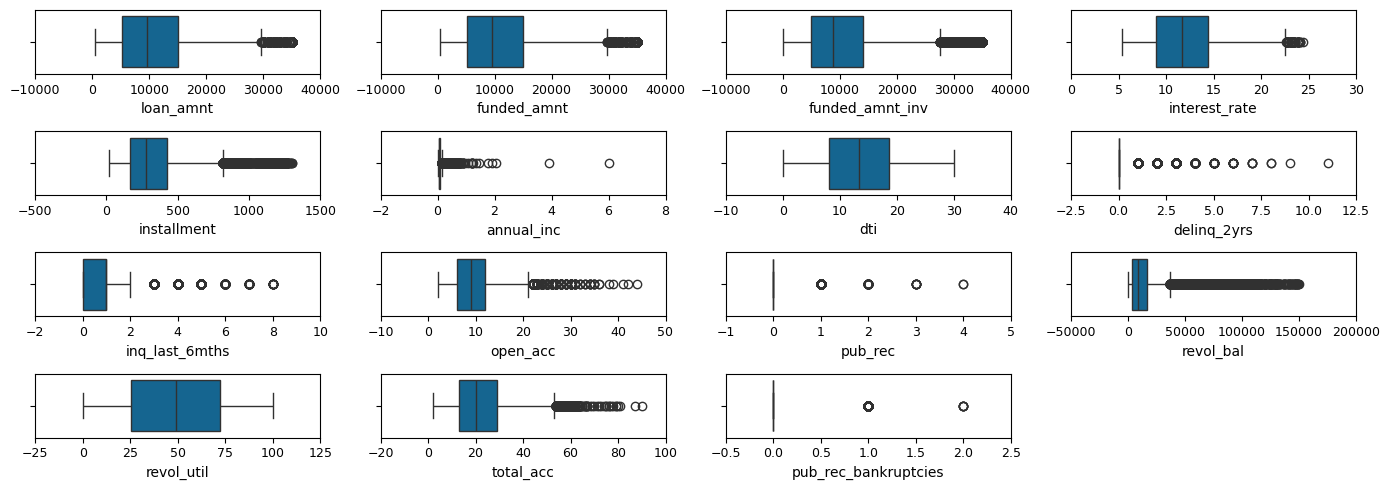

In [80]:
fig, axis = plt.subplots(4, 4, figsize=(14, 5))
axis = axis.flatten() 

# Loop through each numerical column and plot
idx = 0
for col in numerical_cols:
    sns.boxplot(ax=axis[idx], data=df, x=col)
    axis[idx].set_xticks(axis[idx].get_xticks())  # Set the x-ticks explicitly
    axis[idx].set_xticklabels(axis[idx].get_xticklabels(), fontsize=9)
    idx +=1

axis[-1].set_visible(False)
plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Observation</h4>
    <p>From the Box plot of all the numerical columns, we find that annual_income have continuous values and huge gaps in the outlier and it have a potential to affect our analysis. So we are using IQR method to remove outlier.</p>
</div>

In [82]:
print (f'The current dataset contains: {df.shape[0]} Rows and {df.shape[1]} Columns')

The current dataset contains: 38577 Rows and 29 Columns


In [83]:
Q1=df['annual_inc'].quantile(0.25)
Q3=df['annual_inc'].quantile(0.75)
IQR = Q3-Q1

lower_range = Q1-1.5*IQR
upper_range=Q3+1.5*IQR
outlier_IQR=df[(df['annual_inc']<lower_range) | (df['annual_inc']>upper_range)]
df=df.drop(outlier_IQR.index)

In [84]:
print (f'The current dataset contains: {df.shape[0]} Rows and {df.shape[1]} Columns')

The current dataset contains: 36815 Rows and 29 Columns


<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h2 style="color: black;">Univariate Analysis:</h2>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Catergorical Univariate Analysis:</h3>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Ordered Catergorical Univariate Analysis:</h4>
</div>

In [88]:
categorical_cols

array(['term', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'earliest_credit_year', 'issue_quarter_year', 'emp_length',
       'issue_year'], dtype=object)

In [89]:
order_cat_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'earliest_credit_year', 'issue_quarter_year', 'issue_year']

<div style="background-color: #d4ebf2; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Observation</h4>
    <p>All the above columns have discrete values, we are going with bar chart the in the Univariate Analysis.</p>
</div>

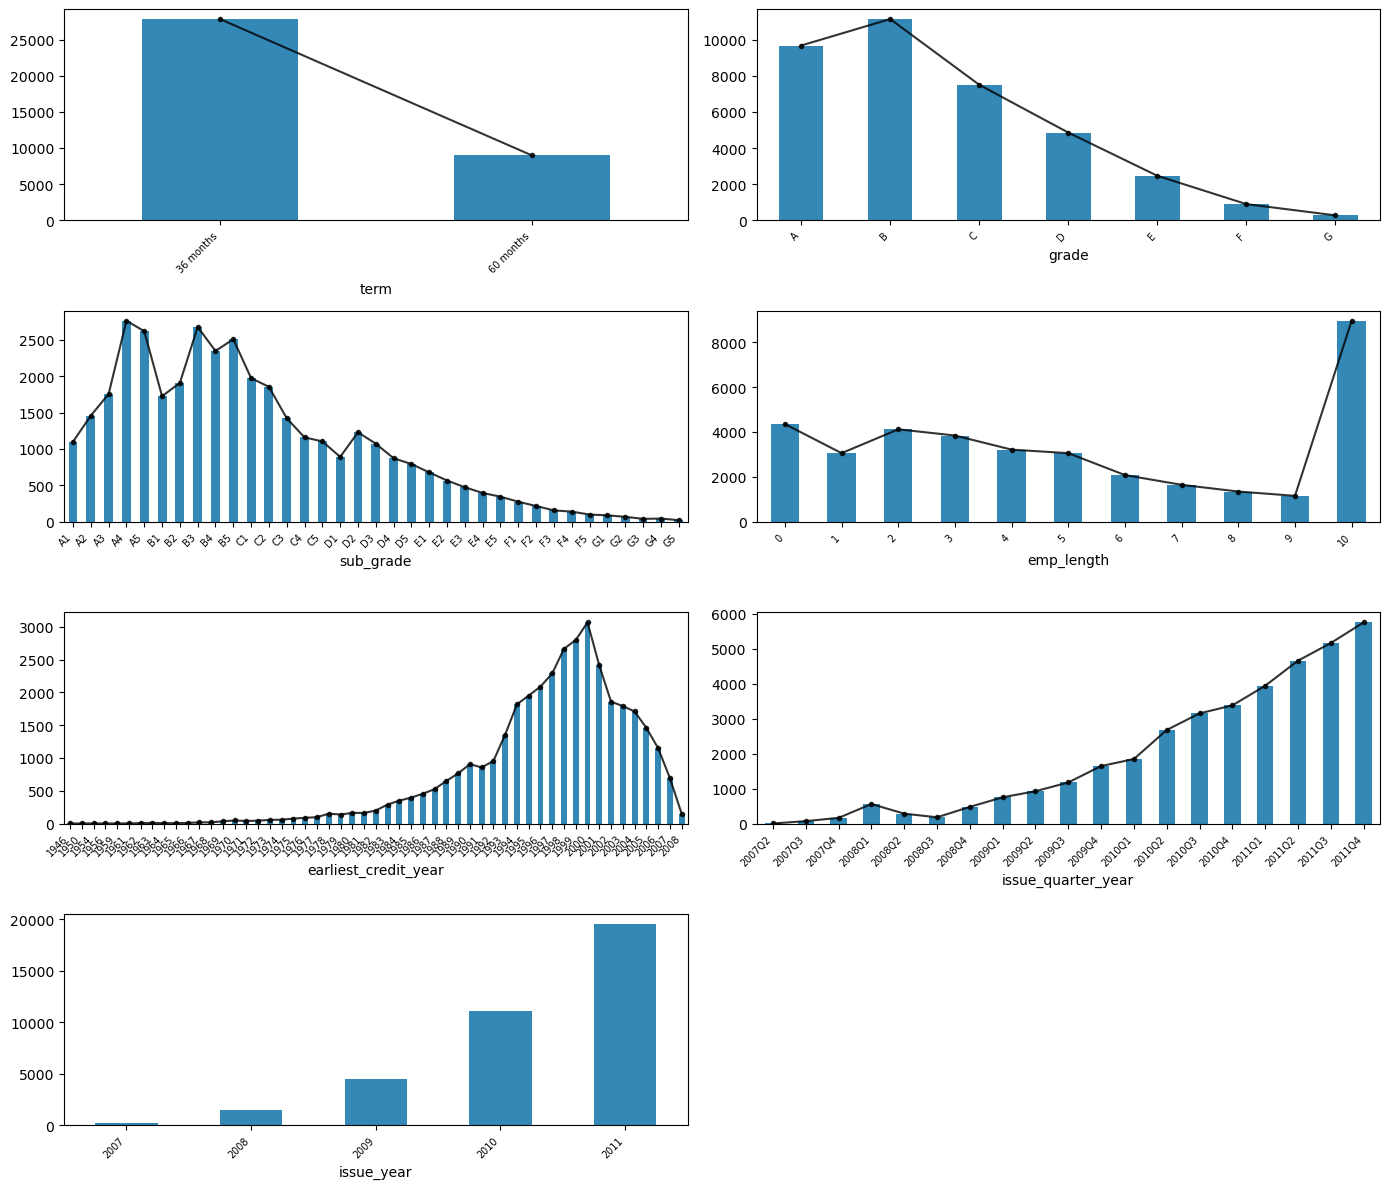

In [91]:
fig, axis = plt.subplots(4, 2, figsize=(14, 12))  
axis = axis.flatten()  

idx = 0
for col in order_cat_cols:
    df[col].value_counts().sort_index().plot.line(ax=axis[idx], color='k', marker='.',alpha=0.8)  # Line plot
    df[col].value_counts().sort_index().plot.bar(ax=axis[idx], alpha=0.8)    # Bar plot
    axis[idx].set_xticklabels(axis[idx].get_xticklabels(), rotation=45, ha='right', fontsize=7)
    idx += 1

axis[-1].set_visible(False)
plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 10px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: grey;">1. Term</h5>
    <p>The majority of loans have a 36-month term.</p>
    <h5 style="color: grey;">2. Grade</h5>
    <p> Loan volume decreases as the loan grade moves from A to G (riskier). Higher-grade loans likely have lower default rates, while lower grades require closer monitoring. (Loans graded A have the lowest expected risk of loss & G loans have the highest expected risk of loss.)</p>
    <h5 style="color: grey;">3. Employee Length</h5>
    <p>The relationship between employment length and loan volume is not strictly linear. Borrowers with 10+ years of employment have the highest loan volume, followed by those with < 1 year.</p>
    <h5 style="color: grey;">4. Earliest Credit Year</h5>
    <p>A downward trend in loan volume for borrowers who established credit more recently (especially from the mid-2000s onwards). Most loan borrowers got their earliest credit line opened in the year 2001. </p>
    <h5 style="color: grey;">5. Issue Year & Issue Quarter by Year</h5>
    <p> There is a general upward trend in loan originations over time, with some seasonality (potentially higher volume in later quarters). 2011 has the most number of accepted loans.</p>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Unordered Catergorical Univariate Analysis:</h4>
</div>

In [94]:
unorder_cat_cols = ['home_ownership','verification_status', 'loan_status', 'purpose', 'addr_state']

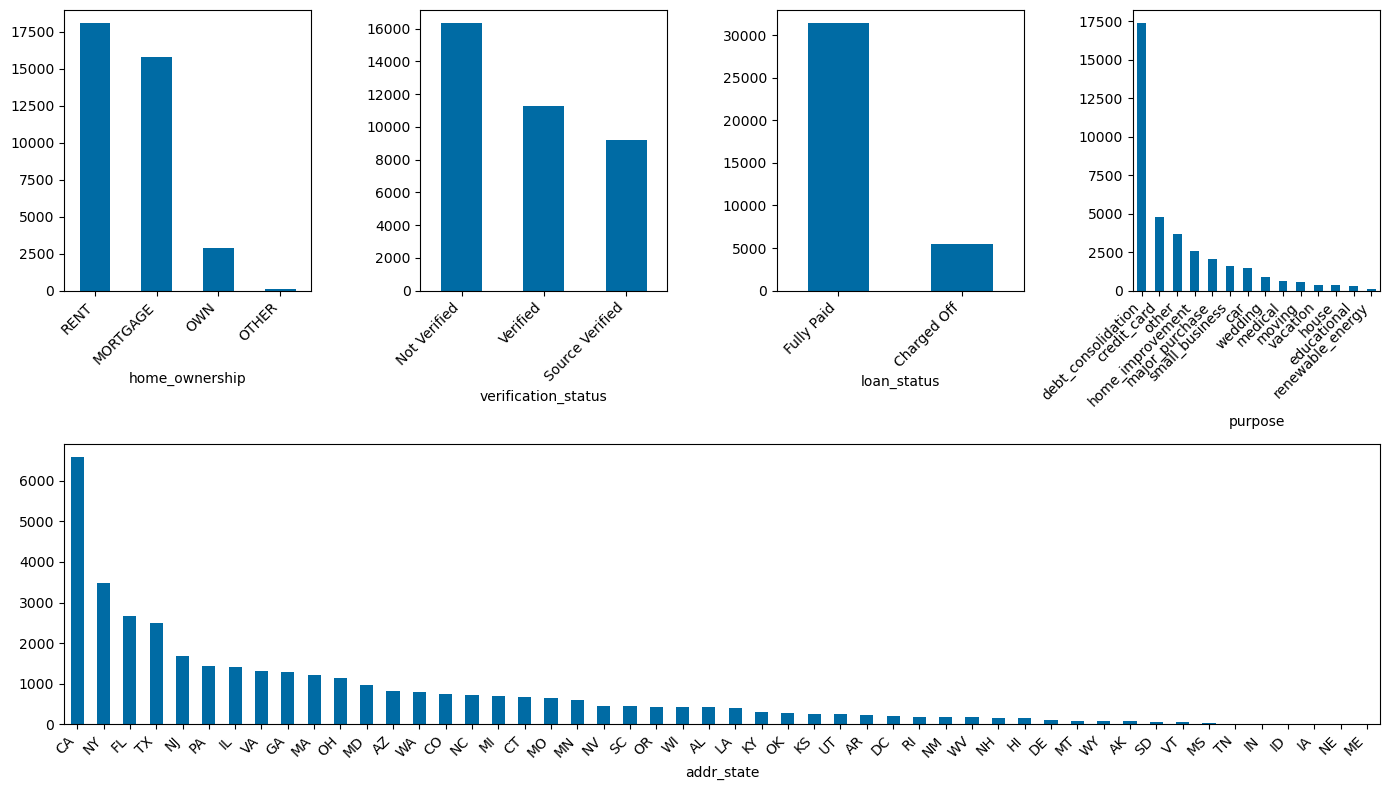

In [95]:
fig = plt.figure(figsize=(14, 8)) # Adjust figsize as needed

# Create a GridSpec object to define the layout
gs = gridspec.GridSpec(2, 4, figure=fig)

# Create the top row of subplots (4 equal-width)
axes = []
for i in range(4):
    axes.append(fig.add_subplot(gs[0, i]))

# Create the bottom subplot spanning 2 columns
ax_bottom = fig.add_subplot(gs[1, :4]) 

# Plot the data
idx = 0
for col in unorder_cat_cols[:-1]:
    df[col].value_counts().plot.bar(ax=axes[idx])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    idx += 1

df[unorder_cat_cols[-1]].value_counts().plot.bar(ax=ax_bottom)
ax_bottom.set_xticklabels(ax_bottom.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 10px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: grey;">1. Home Ownership</h5>
    <p>A large majority of borrowers are either renting or have a mortgage. Very few own their homes outright or fall into the "other" category.</p>
    <h5 style="color: grey;">2. Income Verification Status</h5>
    <p> A significant portion of borrowers have not had their income verified. Majority of the dataset have borrowers who have their income or income source verified.</p>
    <h5 style="color: grey;">3. Loan Status</h5>
    <p>A large majority of loans are marked as "Fully Paid," which is a positive sign. However, there's still a notable proportion of "Charged Off" loans, indicating defaults.</p>
    <h5 style="color: grey;">4. Purpose</h5>
    <p>"Debt consolidation" is the most common loan purpose, followed by "credit card", "other" and "home improvement."</p>
    <h5 style="color: grey;">5. Address State</h5>
    <p> Loan volume varies significantly by state, with California (CA) having the highest and many states having very few loans.</p>
</div>

<div style="background-color: lightgray; padding: 10px;">
    <h3 style="color: black;">Numerical Univariate Analysis</h3>
</div>

In [98]:
numerical_cols

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'interest_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'], dtype=object)

<div style="background-color: #d4ebf2; padding: 10px; border-radius: 5px;">
    <p> Splitting the Numericals columns based on <b>Continuous</b> and <b>Discrete</b> values.  </p>
</div>

<div style="background-color: lightgray; padding: 10px;">
    <h4 style="color: black;">Continuous Numerical Columns</h4>
</div>

In [101]:
conti_numerical_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 
                        'interest_rate','installment', 'annual_inc',
                        'dti', 'revol_bal', 'revol_util']
print (f'The Continuous Numerical Columns are: \n{conti_numerical_cols}')

The Continuous Numerical Columns are: 
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'interest_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util']


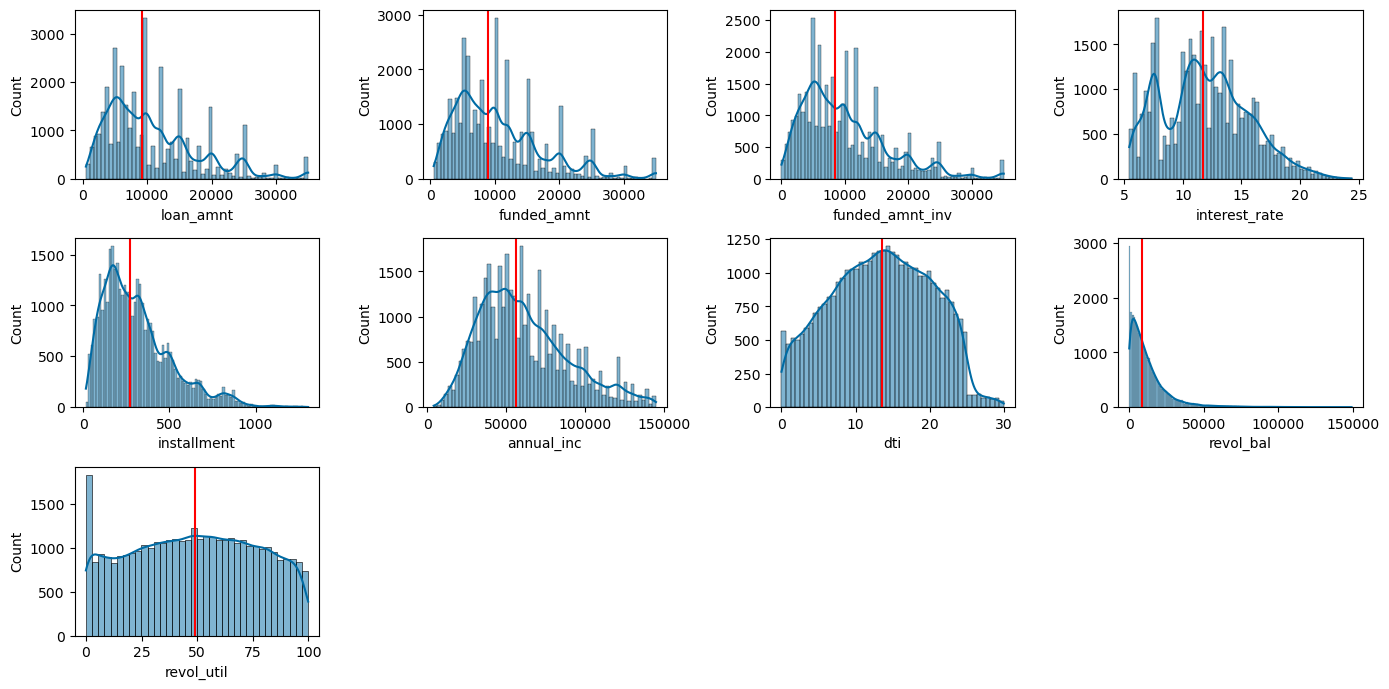

In [102]:
fig, axis = plt.subplots(3, 4, figsize=(14, 7))  
axis = axis.flatten()  

idx = 0
for col in conti_numerical_cols:
    sns.histplot(df[col], ax=axis[idx], kde=True)
    axis[idx].axvline(x = df[col].median(), color='red')
    idx +=1

axis[-1].set_visible(False)
axis[-2].set_visible(False)
axis[-3].set_visible(False)
plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 10px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: grey;">1. Loan_amnt, Funded_amnt, Funded_amnt_inv</h5>
    <p>All three loan amount variables show a strong right skew, meaning most loans are concentrated at lower amounts with a tail extending towards larger loans. There are peaks around common loan amounts (e.g., 5,000, 10,000, 15,000 USD), likely reflecting standard loan offerings.</p>
    <h5 style="color: grey;">2. Interest Rate</h5>
    <p> The interest rate distribution is multimodal (multiple peaks), where we could see multiple peaks around 7.5% and in the range of 10% - 15%. There are fewer loans with larger interest rate , mostly after 17.5%.</p>
    <h5 style="color: grey;">3. Installment</h5>
    <p>Similar to loan amounts, monthly installments are right-skewed, with most borrowers having lower monthly payments.</p>
    <h5 style="color: grey;">4. Annual Income</h5>
    <p>  Annual income is heavily right-skewed, indicating that a large portion of borrowers have lower incomes, with a long tail of higher earners.</p>
    <h5 style="color: grey;">5. Debt-to-income ratio</h5>
    <p>The debt-to-income ratio (DTI) shows a relatively normal distribution, centered around 15%.</p>
    <h5 style="color: grey;">6. Revolving Balance</h5>
    <p>Revolving balance (e.g., credit card debt) is extremely right-skewed, meaning most borrowers have relatively low revolving balances.</p>
    <h5 style="color: grey;">7. Revolving utilization</h5>
    <p>Revolving line utilization (the percentage of available credit being used) had a uniform distribution with more borrowers having revol_util from 0-2.</p>
</div>

<div style="background-color: lightgray; padding: 10px;">
    <h4 style="color: black;">Discrete Numerical Columns</h4>
</div>

In [105]:
disc_numerical_cols = list(set(numerical_cols) - set(conti_numerical_cols))
print (f'The Continuous Numerical Columns are: \n{disc_numerical_cols}')

The Continuous Numerical Columns are: 
['inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'delinq_2yrs', 'total_acc']


In [106]:
df[disc_numerical_cols].nunique()

inq_last_6mths           9
open_acc                40
pub_rec                  5
pub_rec_bankruptcies     3
delinq_2yrs             11
total_acc               81
dtype: int64

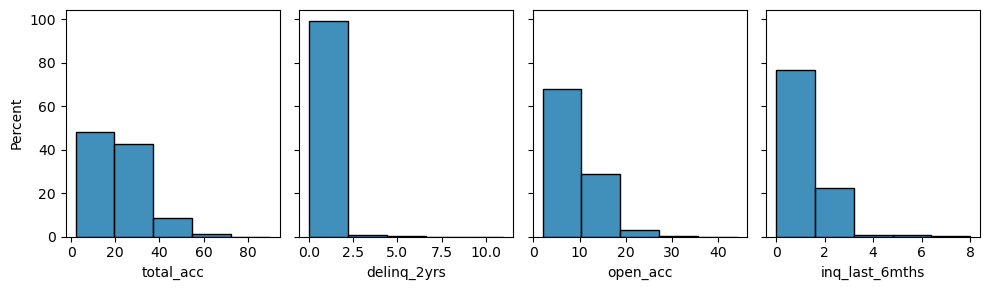

In [107]:
fig, axis = plt.subplots(1, 4, figsize=(10, 3), sharey=True)  
axis = axis.flatten()  

idx = 0
for col in ['total_acc', 'delinq_2yrs', 'open_acc', 'inq_last_6mths']:
    # Taking bins = 5 because it gives a better picture.
    sns.histplot(df[col], ax=axis[idx], bins=5, stat='percent')
    idx +=1

plt.tight_layout()
plt.show()

<div style="background-color: lightblue; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: grey;">1. total_acc - Total Number of Credit Lines</h5>
    <p>The distribution is right-skewed, with a peak around 1-38 total accounts. Most borrowers have a moderate number of credit lines.</p>
    <h5 style="color: grey;">2. delinq_2yrs - Delinquencies in Past 2 Years</h5>
    <p> The distribution is extremely right-skewed, with the vast majority of borrowers having 0 or 1 delinquency in the past two years. This is a positive indicator – most borrowers have a recent history of timely payments.</p>
    <h5 style="color: grey;">3. open_acc - Number of Open Credit Lines</h5>
    <p>Similar to <b>total_acc</b>, the distribution is right-skewed, with most borrowers having around 5-15 open credit accounts. This suggests that while borrowers might have a history of multiple credit accounts (total_acc), they are actively using a smaller subset of those accounts.</p>
    <h5 style="color: grey;">4. inq_last_6mths - Inquiries in Last 6 Months</h5>
    <p> The distribution is heavily right-skewed, with a prominent peak at 0 inquiries. Most borrowers have not had any recent credit inquiries.</p>
</div>

The unique values "pub_rec" contains: [0, 1, 2, 3, 4]
The unique values "pub_rec_bankruptcies" contains: [0.0, 1.0, 2.0]


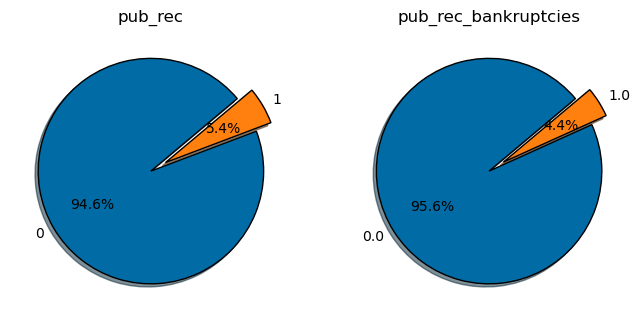

In [109]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(8, 4))  

explode = [0,0.15]
autopct = '%1.1f%%'

# plot 1
groups = df.groupby('pub_rec')['pub_rec'].agg(count = lambda x: len(x))
axis1.pie(groups['count'].to_list()[:2], explode=explode, labels= groups['count'].index.to_list()[:2], startangle=40, autopct= autopct,
        shadow=True, wedgeprops={'edgecolor':'black'})
axis1.set_title('pub_rec')
print(f'The unique values "pub_rec" contains: {groups.index.to_list()}')

#plot 2
groups = df.groupby('pub_rec_bankruptcies')['pub_rec_bankruptcies'].agg(count = lambda x: len(x))
axis2.pie(groups['count'].to_list()[:2], explode=explode, labels= groups['count'].index.to_list()[:2], startangle=40, autopct= autopct,
        shadow=True, wedgeprops={'edgecolor':'black'})
axis2.set_title('pub_rec_bankruptcies')
print(f'The unique values "pub_rec_bankruptcies" contains: {groups.index.to_list()}')

plt.show()

<div style="background-color: lightyellow; padding: 30px; border-radius: 5px;">
    <h4 style="color: black;">Approach</h4>
    <p><b>Column Choice:</b> We choose columns which have uniques lesser than 6.</p>
    <p><b>Data Simplification</b>: We simplified the data by removing categories with extremely low percentages (0.008%). This helps focus the visualization on the most prominent patterns.</p>
    <p><b>Pie Chart Choice:</b> We chose pie charts to effectively show the proportion of borrowers in each category (0 or 1 for both variables after simplification). Pie charts are suitable for visualizing data with a few distinct categories, especially when highlighting relative proportions.</p>
</div>

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <p><b>Overwhelming Majority with No Records</b>: Both pie charts show a dominant majority of borrowers (over 94%) have no derogatory public records or bankruptcies. This suggests that most loan applicants in your dataset have relatively clean financial histories.</p>
        <p><b>Small Percentage with Negative Events</b>: Only a small percentage of borrowers have any negative public records (5.4%) or bankruptcies (4.4%).</p>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h2 style="color: black;">Bivariate Analysis</h2>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Categorical vs Categorical Bivariate Analysis</h3>
</div>

In [114]:
categorical_cols

array(['term', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'earliest_credit_year', 'issue_quarter_year', 'emp_length',
       'issue_year'], dtype=object)

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h4 style="color: black;">Percentage of Default rate:</h4>
    <p> Creating a clear and informative set of bar plots to visualize how loan default rates <b>(% of Default)</b> vary across all categorical columns.</p>

    
</div>

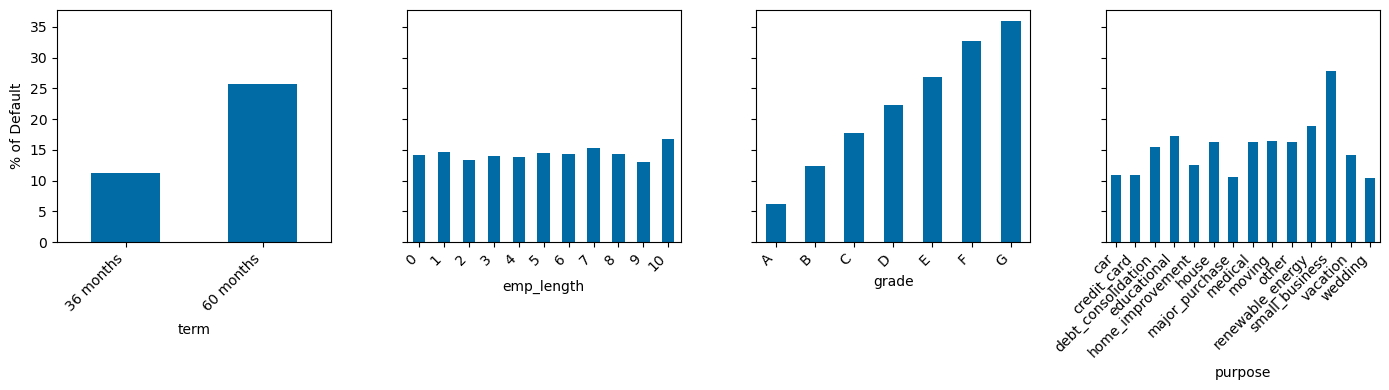

In [116]:
fig, axis = plt.subplots(1,4, figsize=(14, 4), sharey=True)  
axis = axis.flatten() 
idx = 0

for col in ['term', 'emp_length', 'grade', 'purpose']:
    df.groupby(col)['loan_status'].apply(lambda x: (x == 'Charged Off').sum() / len(x) * 100).plot(kind='bar',ax=axis[idx])
    axis[idx].set_ylabel('% of Default')
    axis[idx].set_xticklabels(axis[idx].get_xticklabels(), rotation=45, ha='right')
    idx += 1

plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 10px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: grey;">1. Term</h5>
    <p>Loans with a 60-month term have a significantly higher default rate compared to 36-month loans.</p>
    <h5 style="color: grey;">2. Employee Length</h5>
    <p>  There's no clear linear relationship between employment length and default rate. Borrowers with very short (0-1 year) or longer (9-10 years) employment histories have slightly higher default rates.</p>
    <h5 style="color: grey;">3. Grade</h5>
    <p>Default rates increase as loan grade deteriorates (from A to G). This pattern is a core principle of credit risk: Lower grades reflect higher risk.</p>
    <h5 style="color: grey;">4. Purpose</h5>
    <p>"Small business" loans exhibit the highest default rate, followed by "renewable_energy" and "Educational".
    Car, Credit card, Major purchase and Wedding have lower default rates.</p>
</div>

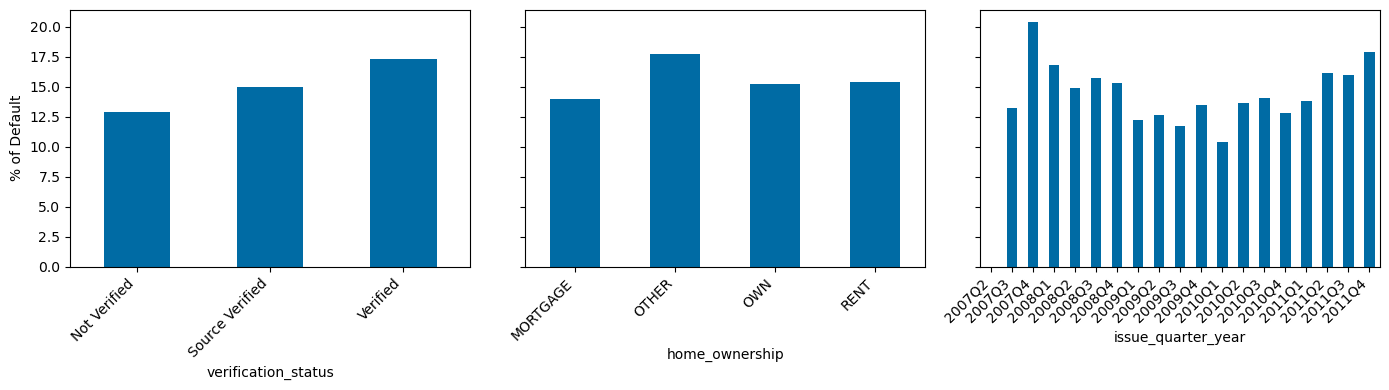

In [118]:
fig, axis = plt.subplots(1,3, figsize=(14, 4), sharey=True)  
axis = axis.flatten() 
idx = 0

for col in ['verification_status', 'home_ownership', 'issue_quarter_year']:
    df.groupby(col)['loan_status'].apply(lambda x: (x == 'Charged Off').sum() / len(x) * 100).plot(kind='bar',ax=axis[idx])
    axis[idx].set_ylabel('% of Default')
    axis[idx].set_xticklabels(axis[idx].get_xticklabels(), rotation=45, ha='right')
    idx += 1

plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: grey;">1. Income Verification Status</h5>
    <p>Loans with "Verified" income have a noticeably higher default rate than "Not Verified" or "Source Verified".</p>
    <h5 style="color: grey;">2. Home Ownership</h5>
    <p>"OTHER" categories have higher default rates compared to others.</p>
    <h5 style="color: grey;">3. Issue Quarter Year</h5>
    <p>There's some fluctuation in default rates across different quarters and years, but no strong consistent trend. Also since, issue year is in past, it cannot help us analyse future default applicants.</p>
</div>

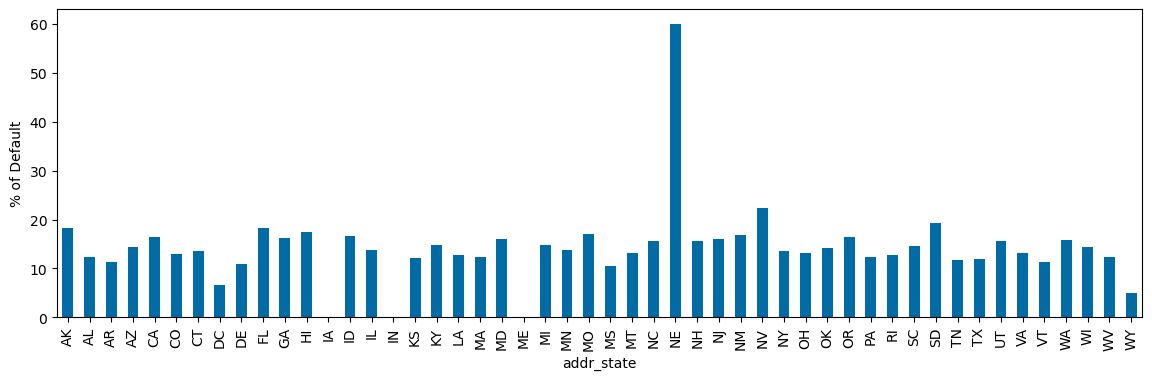

In [120]:
plt.figure(figsize=(14,4))
df.groupby('addr_state')['loan_status'].apply(lambda x: (x == 'Charged Off').sum() / len(x) * 100).plot(kind='bar')

plt.ylabel('% of Default')
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: grey;">Address State</h5>
    <p> Default rates vary significantly by state. One state (NE - Nebraska) stands out with a much higher default rate.</p>
</div>

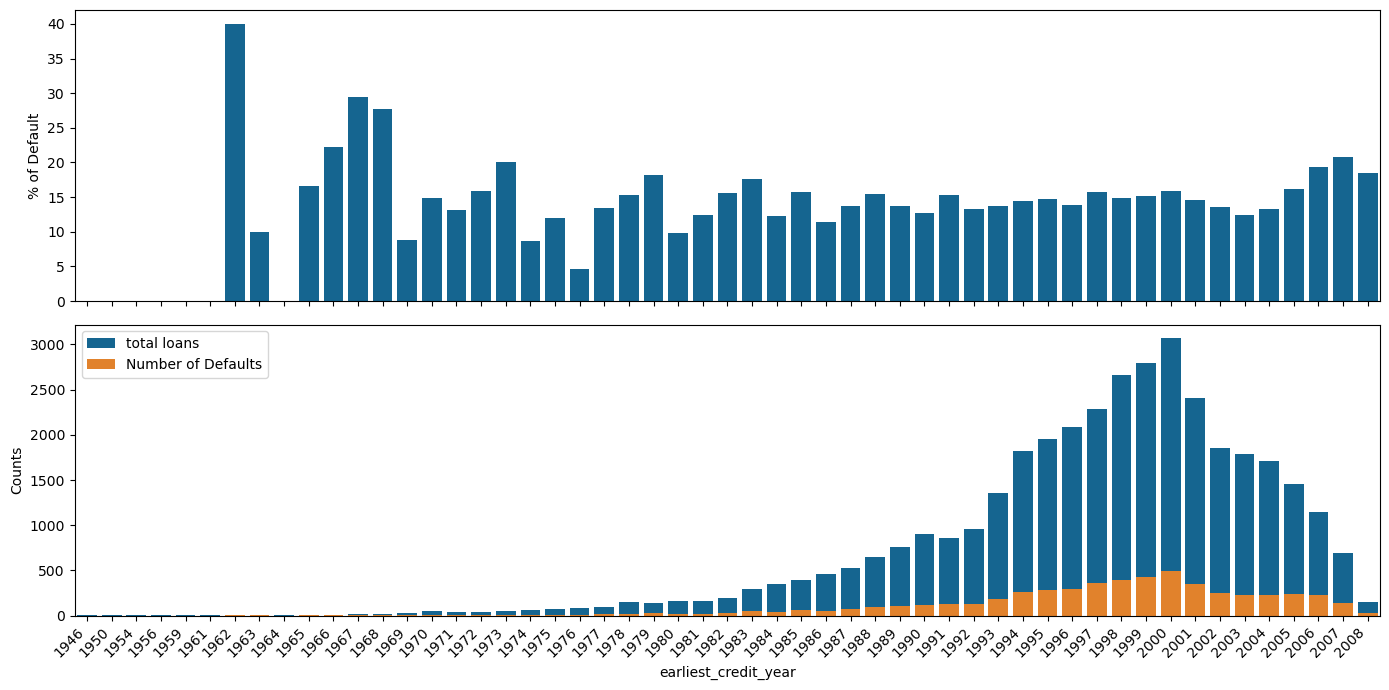

In [122]:
# Creating a groupby based on earliest_credit_year and loan_status
grouped = df.groupby('earliest_credit_year')['loan_status'].agg(
    total_loans=lambda x: len(x),
    defaults=lambda x: (x == 'Charged Off').sum())

# Calculating the default_rate
grouped['default_rate'] = (grouped['defaults'] / grouped['total_loans']) * 100

# Setting up the plot
fig, axis = plt.subplots(2,1, figsize=(14, 7),sharex=True)  
axis = axis.flatten() 

# Plot 1
sns.barplot(grouped.default_rate,ax=axis[0])
axis[0].set_ylabel('% of Default')

# Plot 2
sns.barplot(grouped.total_loans,ax=axis[1], label='total loans')
sns.barplot(grouped.defaults,ax=axis[1], label='Number of Defaults')
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45, ha='right')
axis[1].set_ylabel('Counts')
axis[1].legend(loc='upper left')


plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: grey;">Earliest Credit Year</h5>
    <p> Borrowers who opened their first credit accounts in the early years (around 1962) exhibit a significantly higher default rate. But when comparing with the <b>Plot 2</b>, it shows a different trend.</p>
    </p>
    <p>
        <ul>
            <li>
                1946 to early 1980s: Borrowers with the earliest credit opened in this range had a very small number of loans issued in our dataset for time period 2007 t0 2011, with defaults being negligible or non-existent.
            </li>
            <li>
Mid-1980s to early 2000s: Borrowers with the earliest credit opened in this range have a significant increase in number of loans issued, peaking around 2000. However, defaults also increased but at a smaller rate compared to total loans.
            </li>
            <li>
Post-2000: For borrowers with the earliest credit opened in this range, number of loans issued in 2007-2011 decreased after 2000, with the number of defaults remaining relatively stable but declining as well after 2005.
            </li>
        </ul>
    </p>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Numerical vs Numerical Bivariate Analysis</h3>
</div>

In [125]:
numerical_cols

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'interest_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'], dtype=object)

In [126]:
df_corr_mat = df[['loan_amnt', 'interest_rate', 'installment', 'annual_inc',
                    'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec',
                    'revol_bal','revol_util','total_acc','pub_rec_bankruptcies']].corr()

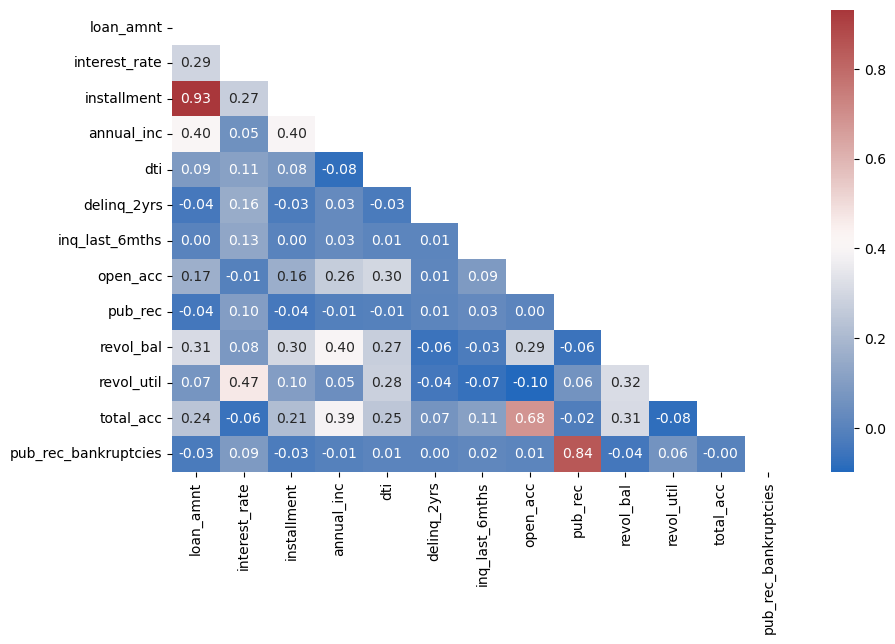

In [127]:
lower_tri = df_corr_mat.where(np.tril(np.ones(df_corr_mat.shape), k=-1).astype(bool))

plt.figure(figsize=(10,6))
sns.heatmap(lower_tri, annot=True, cmap="vlag", fmt='.2f')
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: darkred;"> Strong Positive Correlations (Darker Red)</h5>
        <li> <b>Loan Attributes:</b> loan_amnt and installment show a very strong positive correlation (0.93), which is expected. Larger loan amounts typically come with larger monthly installments.</li>
        <li> <b>Credit History:</b> open_acc (number of open credit lines) and total_acc (total number of credit lines) have a strong positive correlation (0.68), indicating that individuals with more open accounts tend to have a greater total number of accounts.</li>
        <li> <b>Derogatory Records:</b> pub_rec (number of derogatory public records) and pub_rec_bankruptcies also exhibit a strong positive correlation (0.84). This implies that people with bankruptcies are more likely to have other derogatory records on their credit history.</li>
    <h5 style="color: #e099ac;"> Moderate Positive Correlations (Lighter Red):</h5>
        <li> <b>Interest Rate and Revolving Utilization:</b> They show a moderate positive correlation of 0.47. This indicates that as the revolving utilization increases, interest rates at which loans are given also increases. It makes sense as interest rate is also based on the borrowers's credit history.</li>
        <li> <b>Loan Amount & Annual Income:</b> These variables have a moderate positive correlation. It can be deduced that as annual income of a borrower increases, their borrowing capability also increases. Thus, the increase in least loan amount requested.</li>
        <li> <b>Revolving Balance & Annual Income:</b> They show a moderate positive correlation (0.40).</li>
        <li> <b>Total Account & Annual Income:</b> As described above, increase of annual income leads to slight increase in Revolving Balance which may also be a result of more accounts being opened.</li>
        <li> <b>Revolving Balance & Utilization:</b> revol_bal (revolving balance) and revol_util (revolving utilization rate) show a weak positive correlation (0.32). This makes sense as higher revolving balances often lead to higher utilization rates.</li>
</div>

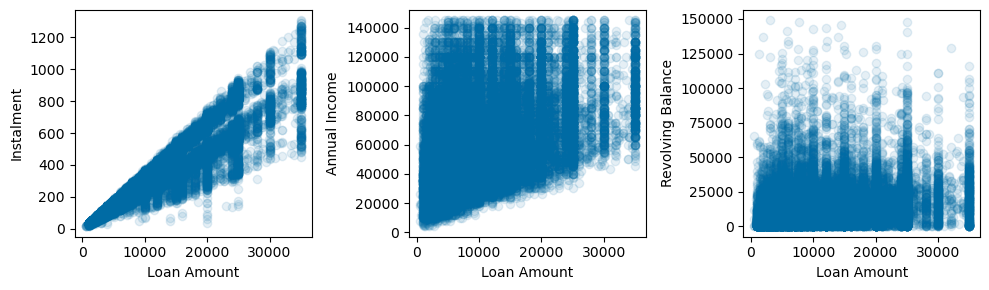

In [129]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(10, 3))  

# Plot 1
axis1.scatter(x=df['loan_amnt'], y=df['installment'], alpha=0.1 )
axis1.set_xlabel('Loan Amount')
axis1.set_ylabel('Instalment')

# Plot 2
axis2.scatter(x=df['loan_amnt'], y=df['annual_inc'], alpha=0.1 )
axis2.set_xlabel('Loan Amount')
axis2.set_ylabel('Annual Income')

# Plot 3
axis3.scatter(x=df['loan_amnt'], y=df['revol_bal'], alpha=0.1 )
axis3.set_xlabel('Loan Amount')
axis3.set_ylabel('Revolving Balance')

plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: black;"> Loan Amount vs. Installment Amount:</h5>
    <p> There's a clear, strong positive linear relationship between loan amount and installment amount. As the loan amount increases, the installment amount also increases proportionally. And also most loan are approved with the rounded figures. </p>
    <h5 style="color: black;"> Loan Amount vs. Annual Income:</h5>
    <p> The plot shows as the borrower annual income increases, the minimum amount they borrow also increase.</p>
    <h5 style="color: black;"> Loan Amount vs. Revolving Balance:</h5>
    <p> As the correlation values is 0.31 which is a weak positive value, There's a less clear relationship between loan amount and revolving balance.</p>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Categorical vs Numerical Bivariate Analysis</h3>
</div>

In [132]:
numerical_cols

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'interest_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'], dtype=object)

In [133]:
new_numerical_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'interest_rate',
                        'annual_inc', 'dti', 'delinq_2yrs',
                        'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
                        'total_acc', 'pub_rec_bankruptcies']

<div style="background-color: lightyellow; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Approach</h4>
    <p> Performing box plot analysis with the numerical columns and segmenting the box based on a categorical variable. This act as a <b>Segmented Univariate Analysis.</b></p>
</div>

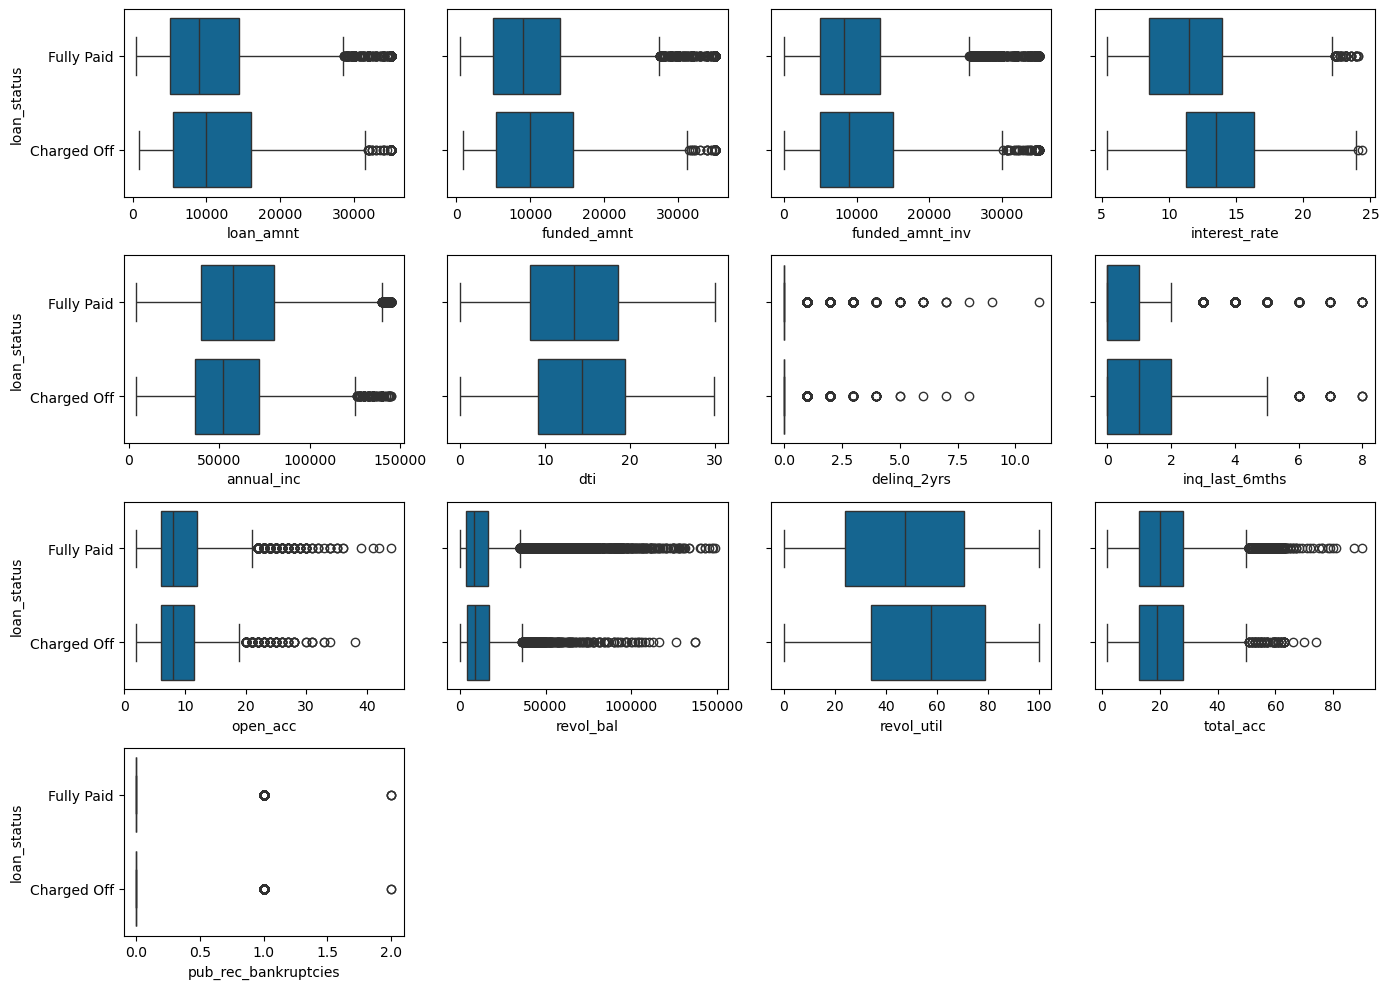

In [135]:
fig, axis = plt.subplots(4,4, figsize=(14, 10), sharey=True)  
axis = axis.flatten() 
idx = 0

for col in new_numerical_cols:
    sns.boxplot(y=df.loan_status,x=df[col], ax=axis[idx])
    idx += 1

axis[-1].set_visible(False)
axis[-2].set_visible(False)
axis[-3].set_visible(False)
plt.tight_layout()
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: black;"> loan_amnt, funded_amnt, funded_amnt_inv:</h5>
    <p> The median loan amount for charged-off loans is slightly higher than for fully paid loans. There's more variability (a wider IQR) in loan amounts for charged-off loans. The max is also higher for charged-off as compared to fully paid.</p>
    <h5 style="color: black;"> interest_rate:</h5>
    <p> 25 percentile of charged off loans have approximately the same interest rate as the median of paid off loans. This indicates that loans with higher interest rate are very likely to being charged off. Charged-off loans have a significantly higher median interest rate compared to fully paid loans.</p>
    <h5 style="color: black;"> annual_inc:</h5>
    <p> The median annual income for fully paid loans is slightly higher than for charged-off loans. However, there's considerable overlap in the distributions, and both groups have a wide range of incomes.</p>
    <h5 style="color: black;"> inq_last_6mths (Inquiries in Last 6 Months):</h5>
    <p> Charged-off loans have median number of inquiries in the past 6 months equivalent to 75% of the paid off loans. This indicates that those borrowers are likely to default for whom more number of inquiries were done.</p>
    <h5 style="color: black;"> revol_util (Revolving Line Utilization):</h5>
    <p> Charged-off loans have a significantly higher median of utilization of credits.</p>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h2 style="color: black;">Multivariate Analysis</h2>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Categorical vs Categorical Vs Categorical</h3>
</div>

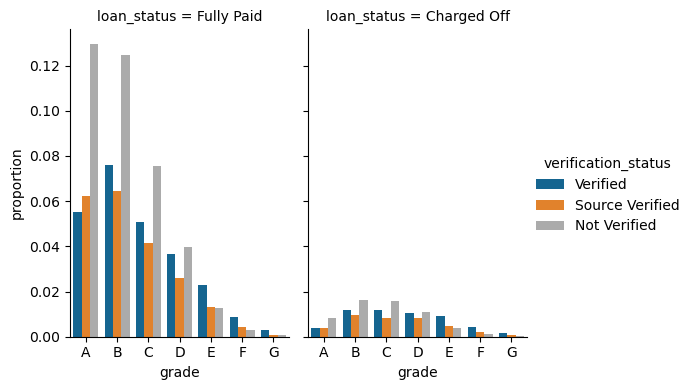

In [139]:
# people with higher grade have larger proportion of not verfied borrower.
sns.catplot(data=df, x='grade', col='loan_status', hue='verification_status',
            kind='count', height=4, aspect=.7, stat='proportion', 
            order= sorted(df['grade'].unique().tolist()))

plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: black;"> Verification Status, Grade, and Loan Status (Bar Plot):</h5>
    <p> This plot effectively shows the interaction between these three categorical variables. The "Not verified" application are strongly getting charged off in the middle of the grade which shows a standard distributional curve.</p>
</div>

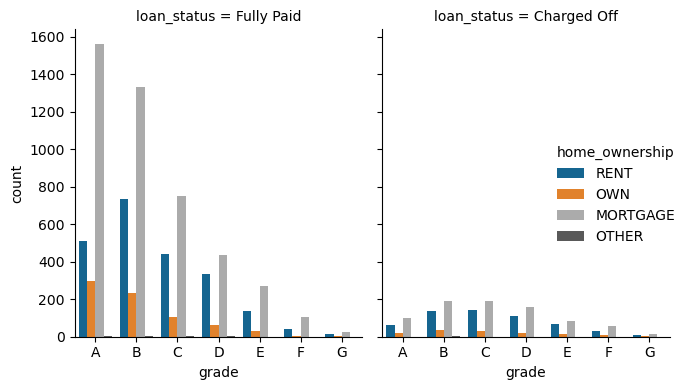

In [141]:
groups = df[(df['emp_length'] == 10)]

sns.catplot(data=groups, x='grade', col='loan_status', hue='home_ownership', kind='count', 
            height=4, aspect=.7,
            order= sorted(df['grade'].unique().tolist()), legend='brief')

plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Numerical vs Categorical Vs Categorical</h3>
</div>

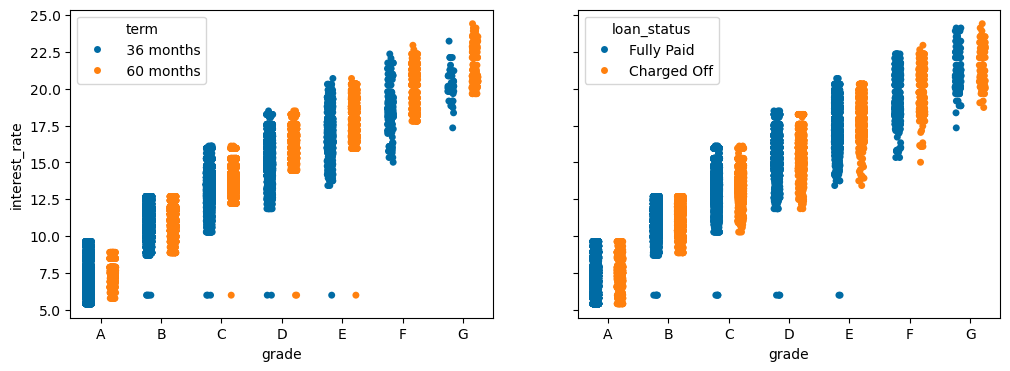

In [143]:
fig, axis = plt.subplots(1,2, figsize=(12, 4), sharey=True)  
axis = axis.flatten() 

# Plot 1
sns.stripplot(ax=axis[0], data=df, y="interest_rate", x="grade", hue="term", dodge=True, order=sorted(df['grade'].unique().tolist()))

# Plot 2
sns.stripplot(ax=axis[1], data=df, y="interest_rate", x="grade", hue="loan_status", dodge=True, order=sorted(df['grade'].unique().tolist()))

plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: black;"> Grade, Term and Interest Rate (Strip Plots):</h5>
    <p> The Stip plots show a clear pattern of increasing interest rates with decrease in borrower creditworthness. And borrowing  loan in 60 months team show the minmum interest rate they pay is greater than 36 month.</p>
    <h5 style="color: black;"> Grade, Loan Status and Interest Rate (Strip Plots):</h5>
    <p> This plot doesn't so any pattern. Borrower with all range of interest rate are going default in every grade.</p>
</div>

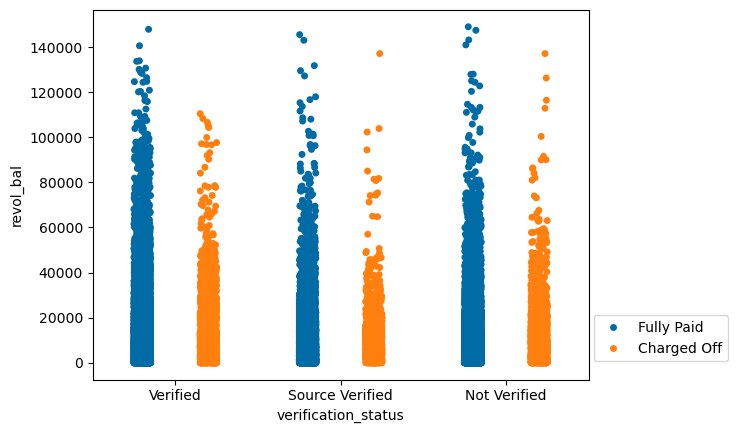

In [145]:
sns.stripplot(data=df, y="revol_bal", x="verification_status", hue="loan_status", dodge=True)

plt.legend(loc=(1.01,0.05))
plt.show()

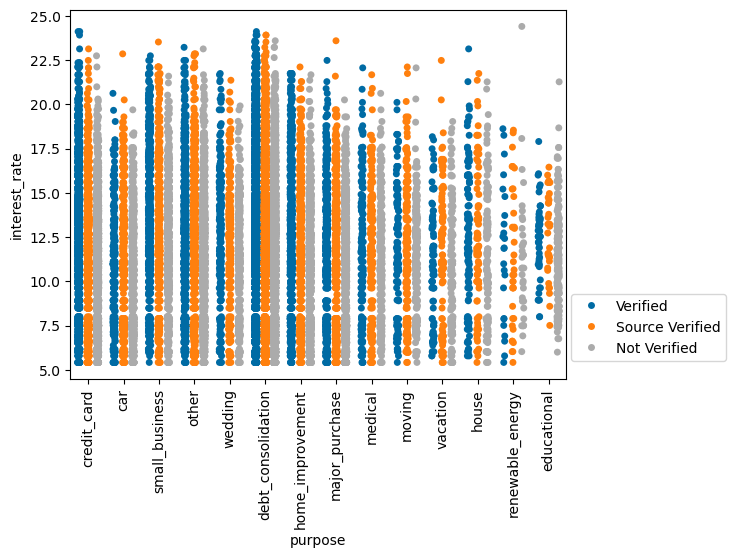

In [146]:

sns.stripplot(data=df, y="interest_rate", x="purpose", hue="verification_status", dodge=True)

plt.xticks(rotation=90)
plt.legend(loc=(1.01,0.05))
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: black;"> Verification Status, Revolving Balance and Loan Status (Strip Plots):</h5>
    <p> The Stip plots show a clear pattern of lower revolving balance has higher concentration of charged off and as the balance increase the charge off decrease.</p>
</div>

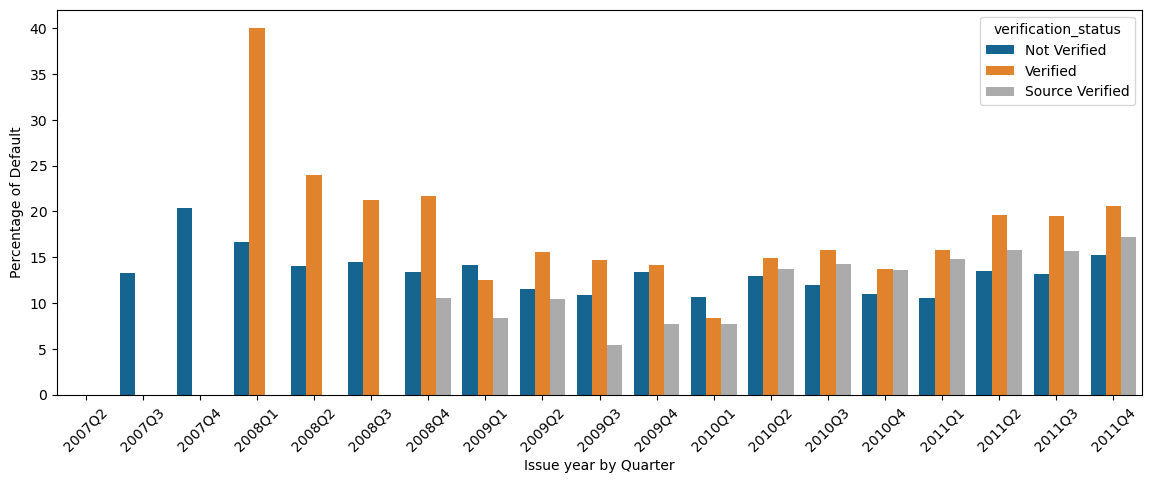

In [148]:
groups = df.groupby(['issue_quarter_year','verification_status'])['loan_status'].agg(
    perc_charge_off= lambda x: (x == 'Charged Off').sum() / len(x) * 100 
    ).reset_index().sort_values(
    ['issue_quarter_year','verification_status'])


plt.figure(figsize=(14,5))

sns.barplot(data=groups, x='issue_quarter_year', y='perc_charge_off', hue='verification_status')

plt.ylabel('Percentage of Default')
plt.xlabel('Issue year by Quarter')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: black;"> Loan Issued Quarter Year, Verification Status, and Default Rate (Bar Plot):</h5>
    <p> This plot highlights how default rates vary across loan issued quarter year (time of loan origination) and verification status. And from the data when the "source verified" is introduced the default rate in been normalized. </p>
</div>

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Numerical vs Categorical Vs Categorical vs Numerical</h3>
</div>

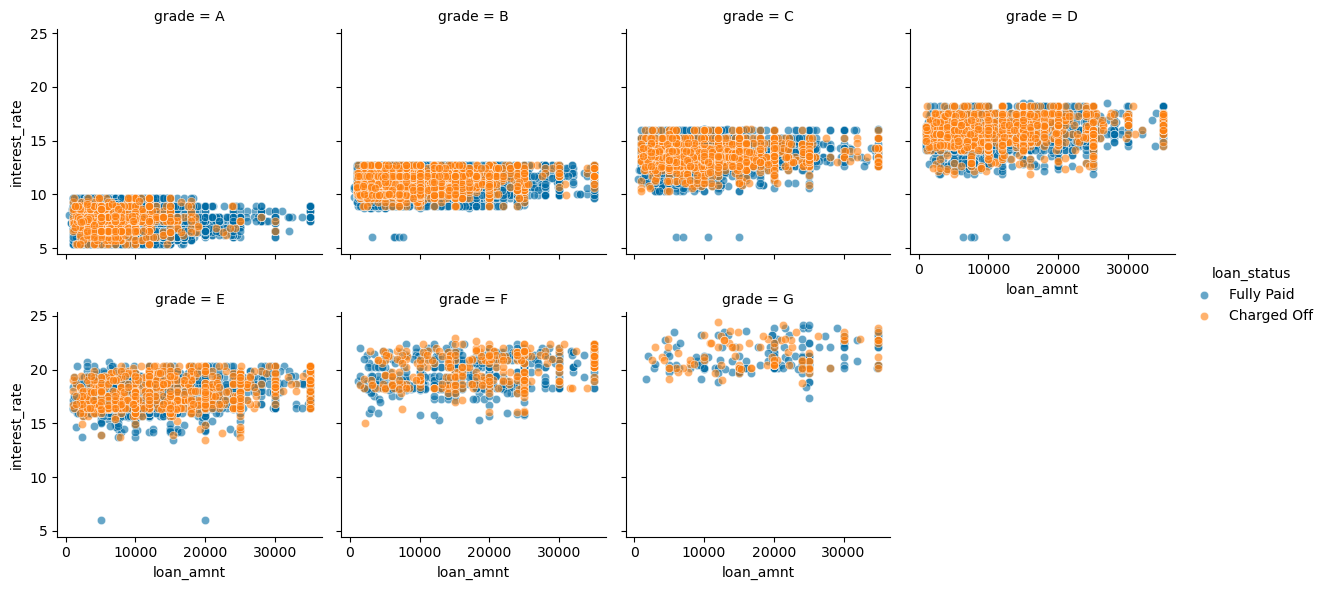

In [151]:
df_sorted = df.sort_values(by='grade')

g = sns.FacetGrid(df_sorted, col="grade", hue="loan_status", col_wrap=4)
g.map(sns.scatterplot, "loan_amnt", "interest_rate", alpha=.6)

g.add_legend()
plt.show()

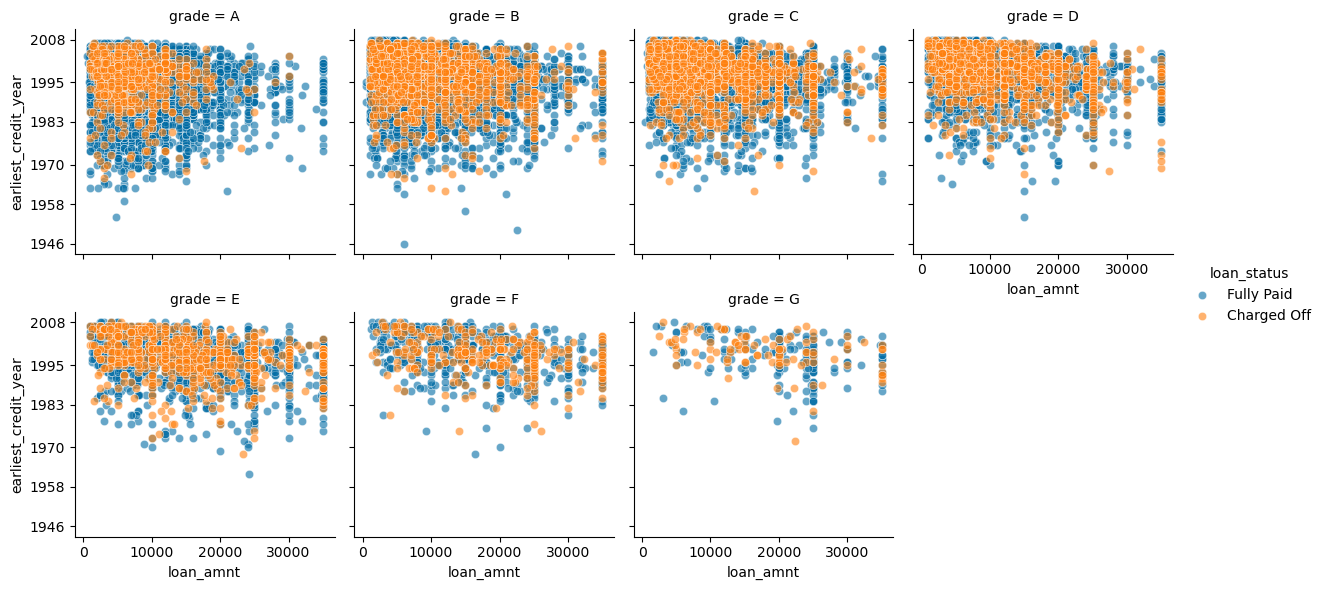

In [152]:
df_sorted = df.sort_values(by='grade')
df_sorted.earliest_credit_year = df['earliest_credit_year'].astype('int')

g = sns.FacetGrid(df_sorted , col="grade", hue="loan_status", col_wrap=4)
g.map(sns.scatterplot, "loan_amnt", "earliest_credit_year", alpha=.6)

for ax in g.axes.flat:
    y_ticks = np.linspace(
                    start= int(df_sorted['earliest_credit_year'].min()), 
                    stop= int(df_sorted['earliest_credit_year'].max()), 
                    num=6, dtype='int')
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([int(tick) for tick in y_ticks])

g.add_legend()
plt.show()

<div style="background-color: #d4ebf2; padding: 30px; border-radius: 5px;">
    <h4 style="color: blue;">Observation</h4>
    <h5 style="color: black;"> loan_amnt, grade, earliest_credit_year, and loan_status:</h5>
    <p> There's no strong visual pattern indicating a clear relationship between loan amount and the year the borrower's earliest credit line was opened (earliest_credit_year). </p>
</div>

<div style="text-align: center; line-height:10px; padding: 10px; border-radius: 5px; font-size:70px;">
    <h5>The End</h5>
</div>
